<a href="https://colab.research.google.com/github/shanzabakhtds/CodSoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**


> To develop a machine learning model for the purpose of identifying fraudulent credit card transactions.



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
from matplotlib import pyplot as plt # for pie charts and visualizing results
import seaborn as sns

# **Loading Dataset**

In [3]:
df=pd.read_csv("/content/creditcard.csv")

# **Checking The Coloumn Names in our Dataset**

In [11]:
#print(df.columns)
print("\n Columns Names are : ")
print("  ")
df.columns



 Columns Names are : 
  


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# **Exploring The DataSet**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
df.info()  #allows us to learn the shape of object types of our data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

# **Checking the dimension of the dataset**

In [10]:
print("Dimensions of the dataset in (rows, columns): ", df.shape)

Dimensions of the dataset in (rows, columns):  (9965, 31)


There are 9965 rows and 31 columns in the dataset


# **Check the number of values in each column**

In [17]:
print("The number of values in each column are:\n \n ")
df.nunique()

The number of values in each column are:
 
 


Time      6442
V1        9756
V2        9756
V3        9755
V4        9755
V5        9755
V6        9755
V7        9755
V8        9755
V9        9755
V10       9755
V11       9755
V12       9755
V13       9755
V14       9755
V15       9755
V16       9755
V17       9755
V18       9755
V19       9755
V20       9755
V21       9755
V22       9755
V23       9755
V24       9755
V25       9755
V26       9755
V27       9755
V28       9755
Amount    3769
Class        2
dtype: int64

# **Count Number of Fraud and Non-fraud Records**

In [22]:

fc = df['Class'].value_counts()[1]    #fraud_count=fc
nfc = df['Class'].value_counts()[0]   #nonfraud_count=nfc

print(f"Number of Fraud Records: {fc}")
print(f"Number of Non-Fraud Records: {nfc}")

Number of Fraud Records: 38
Number of Non-Fraud Records: 9926


# **Select sample of the records from the dataset**

In [24]:
fraud_size = 469
fraud_data_sampled = fraud_data.sample(n=fraud_size, replace=True, random_state=42)

nonfraud_size = 10000
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, replace=True, random_state=42)


This change allows the sample method to draw more instances than the actual size of the population by allowing duplicates in the sample.

# **Determine the count of null values**

In [29]:

# Assume we have already defined fraud_data and not_fraud_data

fraud_size = 469
fraud_data_sampled = fraud_data.sample(n=fraud_size, replace=True, random_state=42)

nonfraud_size = 10000
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, replace=True, random_state=42)

random_sample_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])
random_sample_df = random_sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now you can print the total null values
total_null_values = random_sample_df.isna().sum()
for column, null_count in total_null_values.items():
    print(f"Total Null Values in {column}: {null_count}")



Total Null Values in Time: 0
Total Null Values in V1: 0
Total Null Values in V2: 0
Total Null Values in V3: 0
Total Null Values in V4: 0
Total Null Values in V5: 0
Total Null Values in V6: 0
Total Null Values in V7: 0
Total Null Values in V8: 0
Total Null Values in V9: 0
Total Null Values in V10: 0
Total Null Values in V11: 0
Total Null Values in V12: 0
Total Null Values in V13: 0
Total Null Values in V14: 0
Total Null Values in V15: 0
Total Null Values in V16: 0
Total Null Values in V17: 0
Total Null Values in V18: 0
Total Null Values in V19: 0
Total Null Values in V20: 0
Total Null Values in V21: 0
Total Null Values in V22: 0
Total Null Values in V23: 0
Total Null Values in V24: 0
Total Null Values in V25: 0
Total Null Values in V26: 0
Total Null Values in V27: 0
Total Null Values in V28: 0
Total Null Values in Amount: 0
Total Null Values in Class: 0


## **Determine the count of null values**

In [30]:
total_duplicates = random_sample_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 4189


# **Drop duplicate records**

In [31]:
random_sample_df.drop_duplicates(inplace=True)
print(random_sample_df)

        Time        V1        V2        V3        V4        V5        V6  \
0      14229 -0.470692  1.129798  1.816409  0.102452 -0.020680 -0.631221   
1       3307  0.931541 -0.675905  1.149347  0.359354 -1.196286 -0.047082   
2        221 -0.342871 -0.199546  1.976353 -0.003495 -1.170366  0.883501   
3       3656 -0.907845  0.857006  1.980520  4.651249  1.134327  0.473895   
4      10980 -0.046786  0.030050  2.037794 -0.670130 -0.727283 -0.588537   
...      ...       ...       ...       ...       ...       ...       ...   
10457   1728  1.018059 -0.157090  0.410519  1.384888 -0.448033 -0.012430   
10458  12404  1.086856  0.593143  0.676583  3.052437 -0.213719 -0.107482   
10460   3467 -0.933266  0.142091  2.947068  0.552175 -0.632006  0.395576   
10463    881 -0.660287  0.736979  0.861225  0.934375 -0.431884 -0.409751   
10465   3606 -0.939105  1.364749  1.281192  1.344473  0.043464  0.352401   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.5440

# **Descriptive Statistics**

In [33]:
description=random_sample_df.describe()
print("\n \n ")
print(description)


 
 
               Time           V1           V2           V3           V4  \
count   6280.000000  6280.000000  6280.000000  6280.000000  6280.000000   
mean    5881.221019    -0.236597     0.276995     0.897949     0.265046   
std     4445.642426     1.496094     1.305903     1.229427     1.462371   
min        0.000000   -23.066842   -25.640527   -15.496222    -4.657545   
25%     2000.000000    -1.010982    -0.219488     0.413673    -0.621376   
50%     4485.000000    -0.373102     0.290430     0.950897     0.216900   
75%     9995.000000     1.147970     0.897134     1.602840     1.125457   
max    14861.000000     1.960497     8.636214     4.101716    10.343228   

                V5           V6           V7           V8           V9  ...  \
count  6280.000000  6280.000000  6280.000000  6280.000000  6280.000000  ...   
mean     -0.047464     0.130661    -0.063782    -0.040973     0.782628  ...   
std       1.180328     1.307514     1.109913     1.174314     1.172928  ...   
min

**# Visualizing the Distribution of Numerical Features in a Randomly Sampled Dataset**

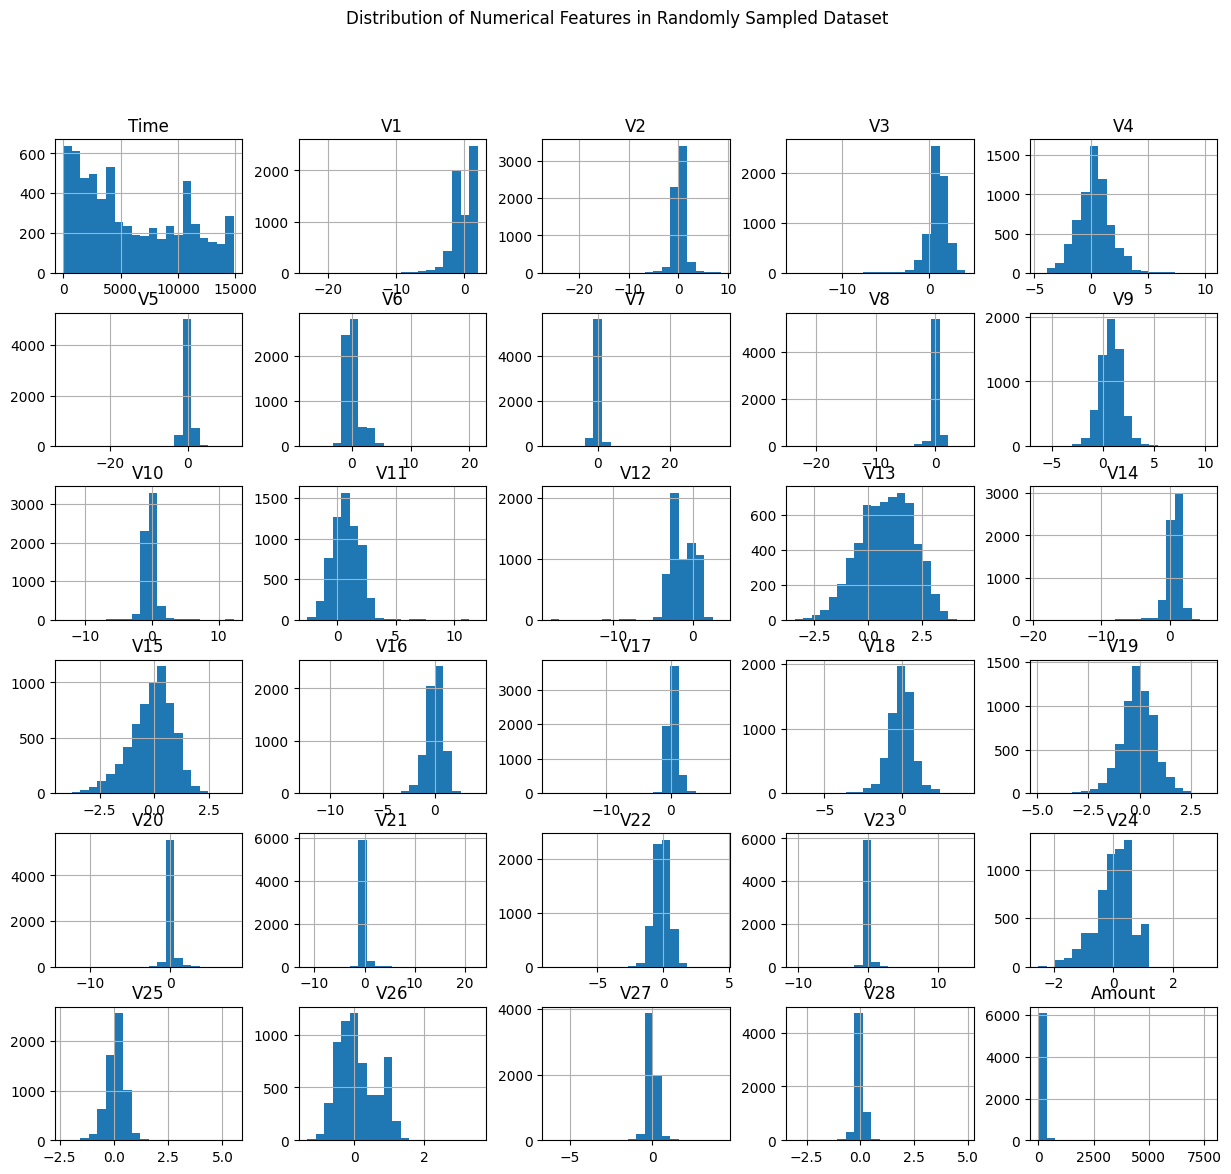

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

random_sample_df.drop('Class', axis=1).hist(figsize=(15, 13), bins=20)
plt.suptitle('Distribution of Numerical Features in Randomly Sampled Dataset')
plt.show()

**Count of Fraud/Non-Fraud Records**

In [35]:
class_counts = random_sample_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
0.0    6242
1.0      38
Name: Class, dtype: int64


# **Split features and Label**

In [36]:
X = random_sample_df.drop(["Class"], axis=1)
Y = random_sample_df["Class"]

# **Outliers identification and removal**

In [37]:
from scipy.spatial.distance import mahalanobis

# Resetting index for X and Y
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Calculate Mahalanobis distance
covariance = np.cov(X.T)
mean = np.mean(X, axis=0)
distances = [mahalanobis(x, mean, np.linalg.inv(covariance)) for x in X.values]

# Define the threshold for outliers
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify and handle outliers
outlier_mask = np.array(distances) > threshold
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Identify and handle outliers by removing them
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Display the modified feature set and labels without outliers
print(X_no_outliers)
print(Y_no_outliers)



       Time        V1        V2        V3        V4        V5        V6  \
0     14229 -0.470692  1.129798  1.816409  0.102452 -0.020680 -0.631221   
1      3307  0.931541 -0.675905  1.149347  0.359354 -1.196286 -0.047082   
2       221 -0.342871 -0.199546  1.976353 -0.003495 -1.170366  0.883501   
3      3656 -0.907845  0.857006  1.980520  4.651249  1.134327  0.473895   
4     10980 -0.046786  0.030050  2.037794 -0.670130 -0.727283 -0.588537   
...     ...       ...       ...       ...       ...       ...       ...   
6097   1728  1.018059 -0.157090  0.410519  1.384888 -0.448033 -0.012430   
6098  12404  1.086856  0.593143  0.676583  3.052437 -0.213719 -0.107482   
6099   3467 -0.933266  0.142091  2.947068  0.552175 -0.632006  0.395576   
6100    881 -0.660287  0.736979  0.861225  0.934375 -0.431884 -0.409751   
6101   3606 -0.939105  1.364749  1.281192  1.344473  0.043464  0.352401   

            V7        V8        V9  ...       V20       V21       V22  \
0     0.544051 -0.030913  

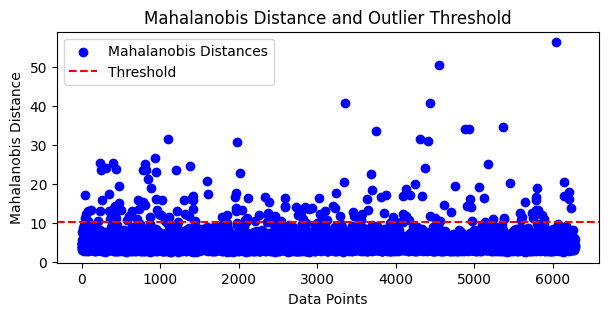

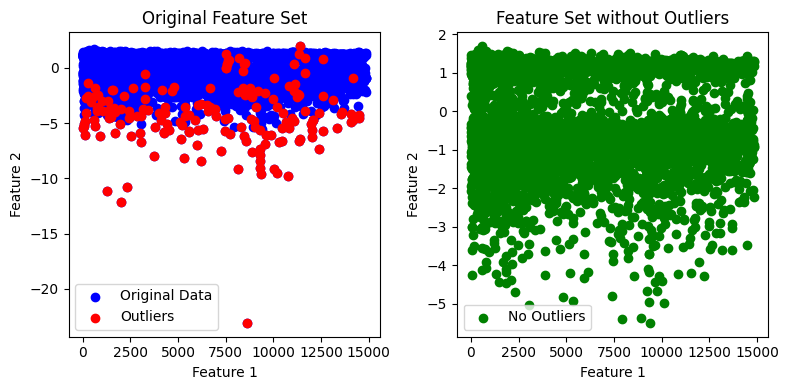

In [39]:
import matplotlib.pyplot as plt

# Plotting Mahalanobis distances and outlier threshold
plt.figure(figsize=(7, 3))
plt.scatter(range(len(distances)), distances, c='blue', label='Mahalanobis Distances')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Data Points')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance and Outlier Threshold')
plt.legend()
plt.show()

# Before and after outliers removal visualization
plt.figure(figsize=(8, 4))

# Subplot 1: Original feature set
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Original Data')
plt.scatter(X[outlier_mask].iloc[:, 0], X[outlier_mask].iloc[:, 1], c='red', label='Outliers')
plt.title('Original Feature Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Subplot 2: Feature set without outliers
plt.subplot(1, 2, 2)
plt.scatter(X_no_outliers.iloc[:, 0], X_no_outliers.iloc[:, 1], c='green', label='No Outliers')
plt.title('Feature Set without Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


# **Splitting train and test data**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X_no_outliers, Y_no_outliers, test_size=0.3, random_state=42)


# **Selecting Top Effective Features**

In [41]:
# Train the decision tree model
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=4, criterion="entropy")
model.fit(X_train, Y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Select the top N features (e.g., top 10)
top_n = 10
top_n_features = X_train.columns[indices[:top_n]]

# Subset the training and test sets with the top N features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

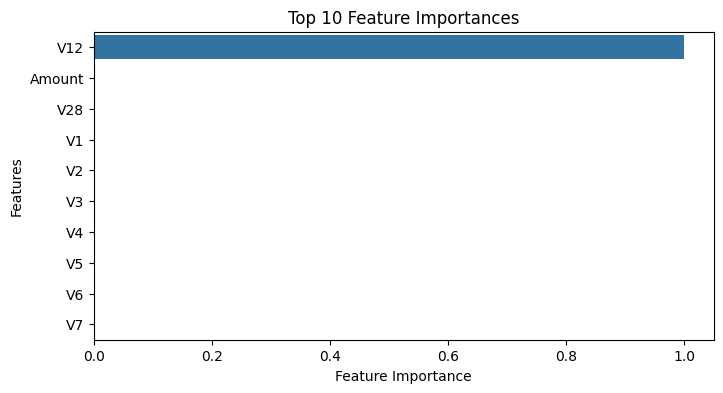

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances[indices[:top_n]], y=top_n_features)
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# **Standard Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# **Decision Tree Model Training**

In [44]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=10, max_depth=4,criterion="entropy")

# Train the model on the training data
dt_model.fit(X_train_selected, Y_train)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test_selected)

# **Decision Tree Model Plotting**

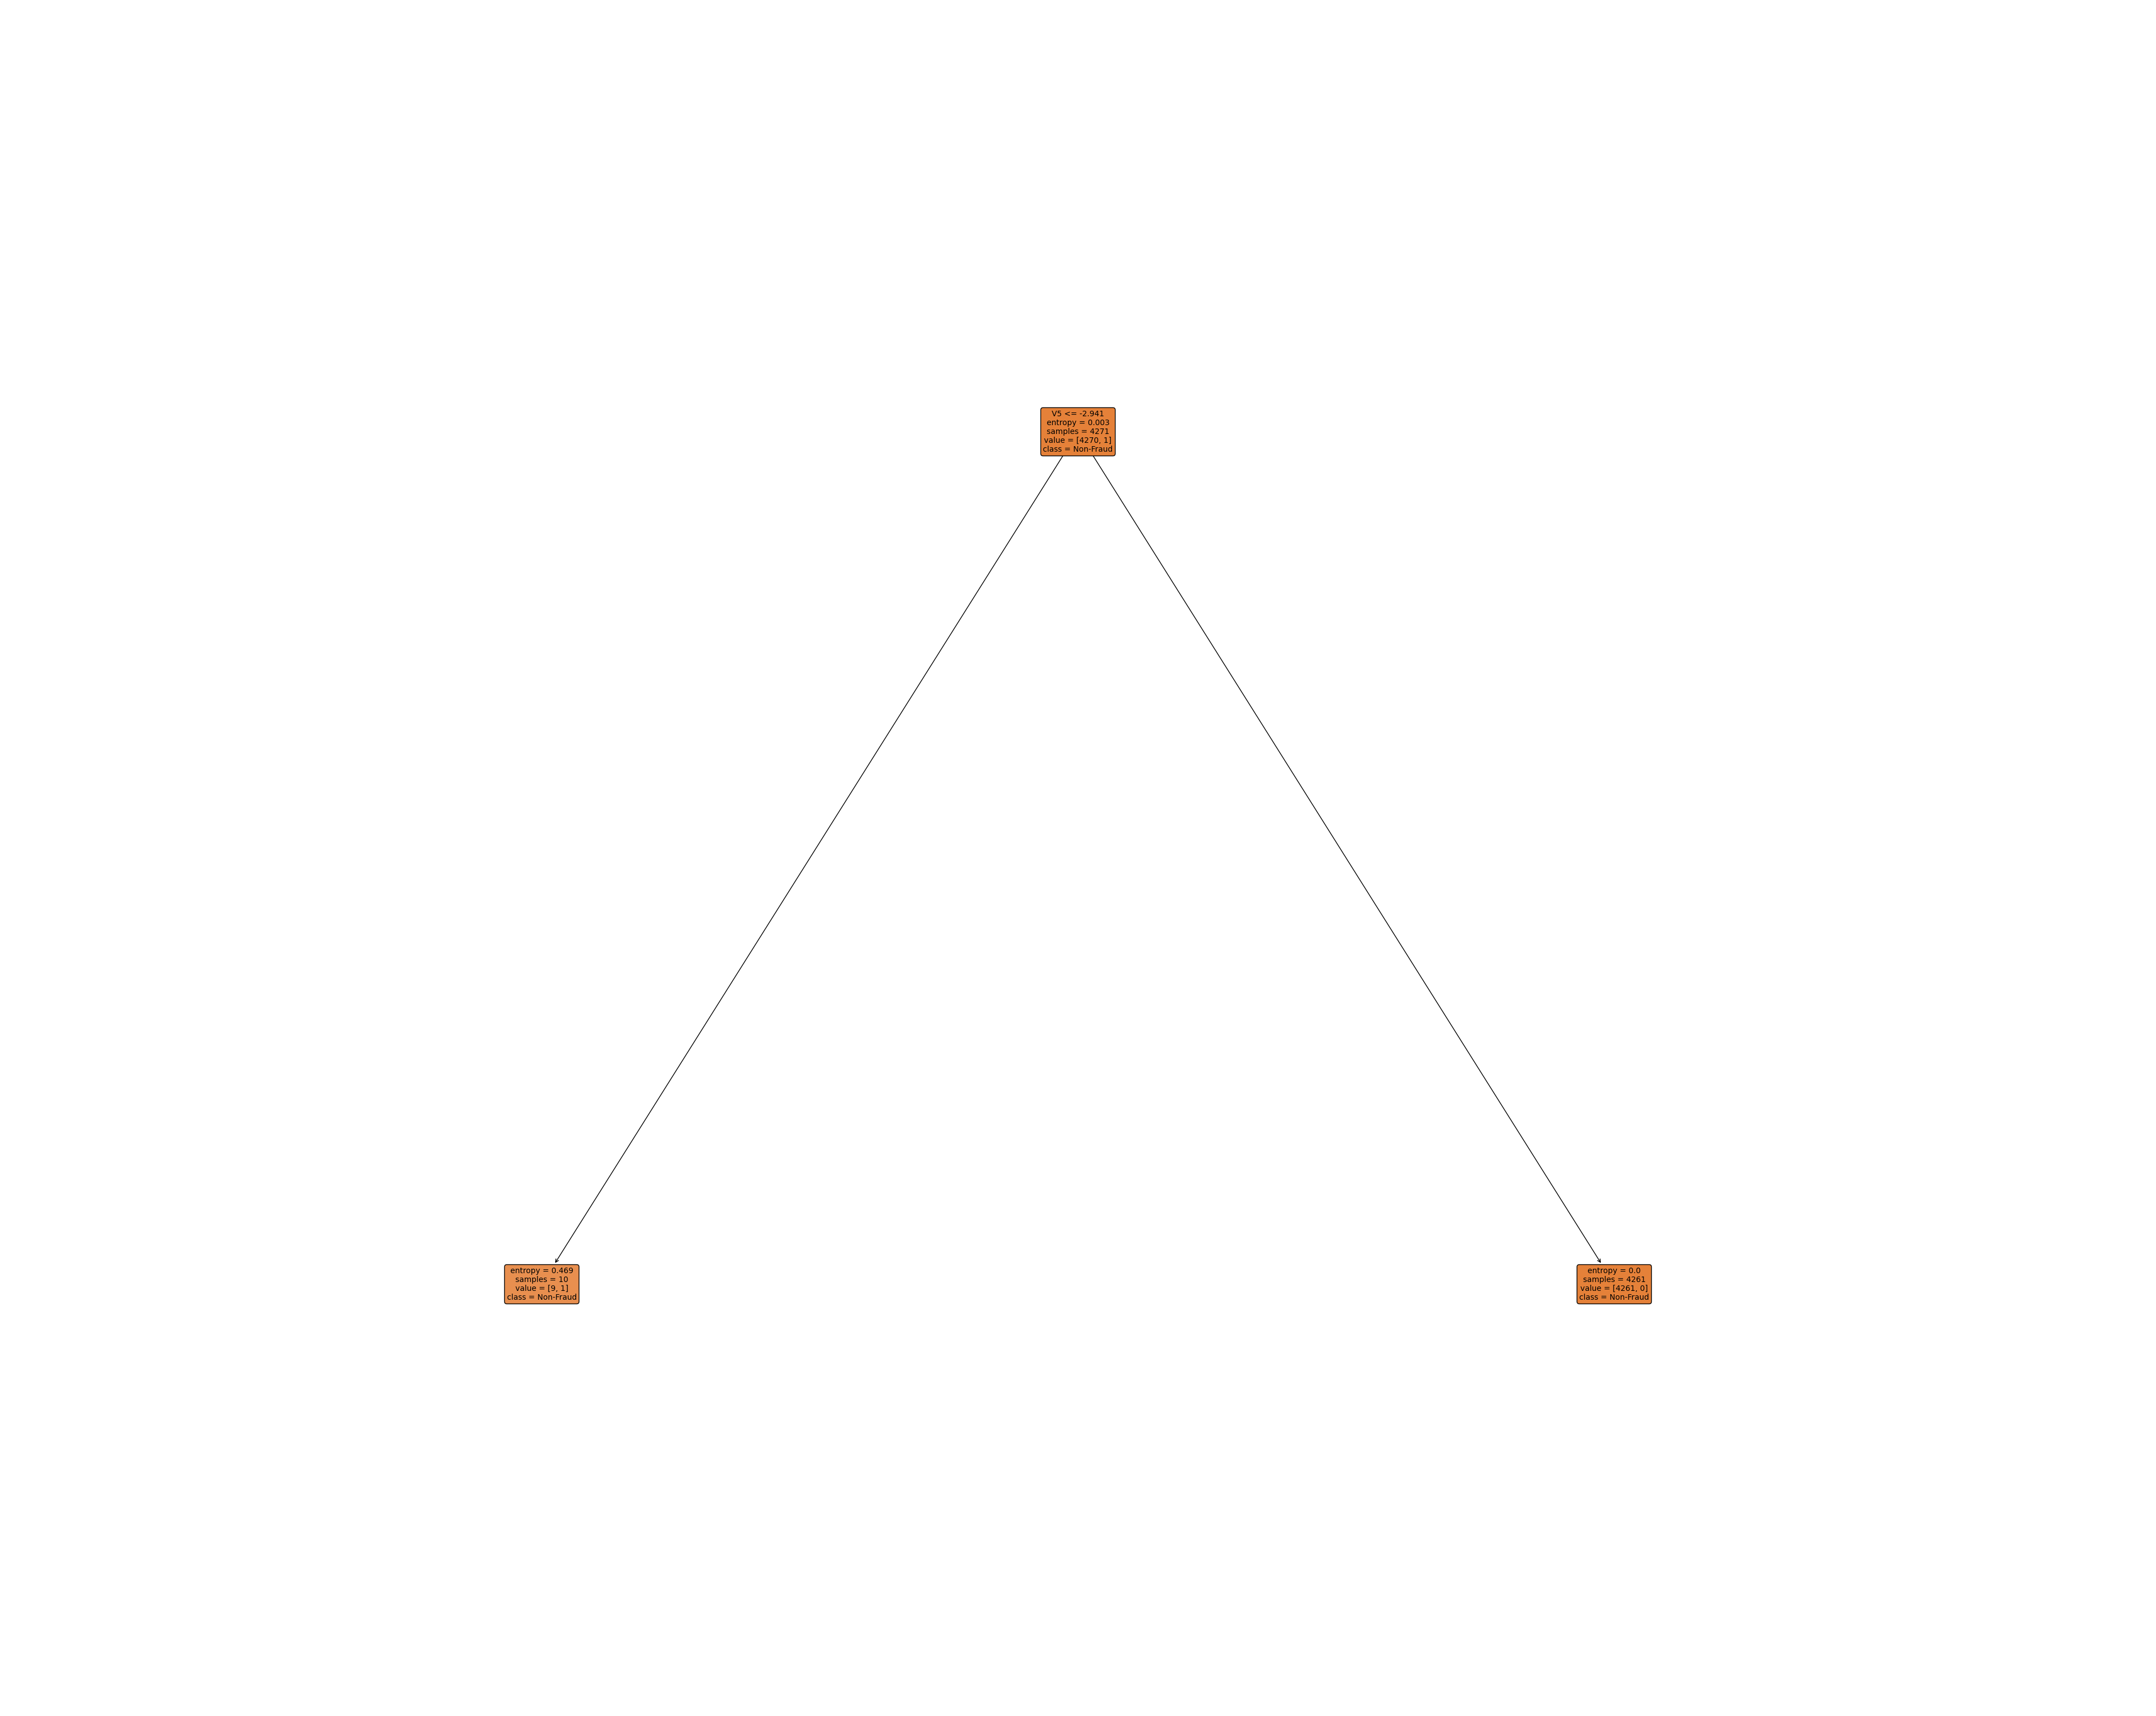

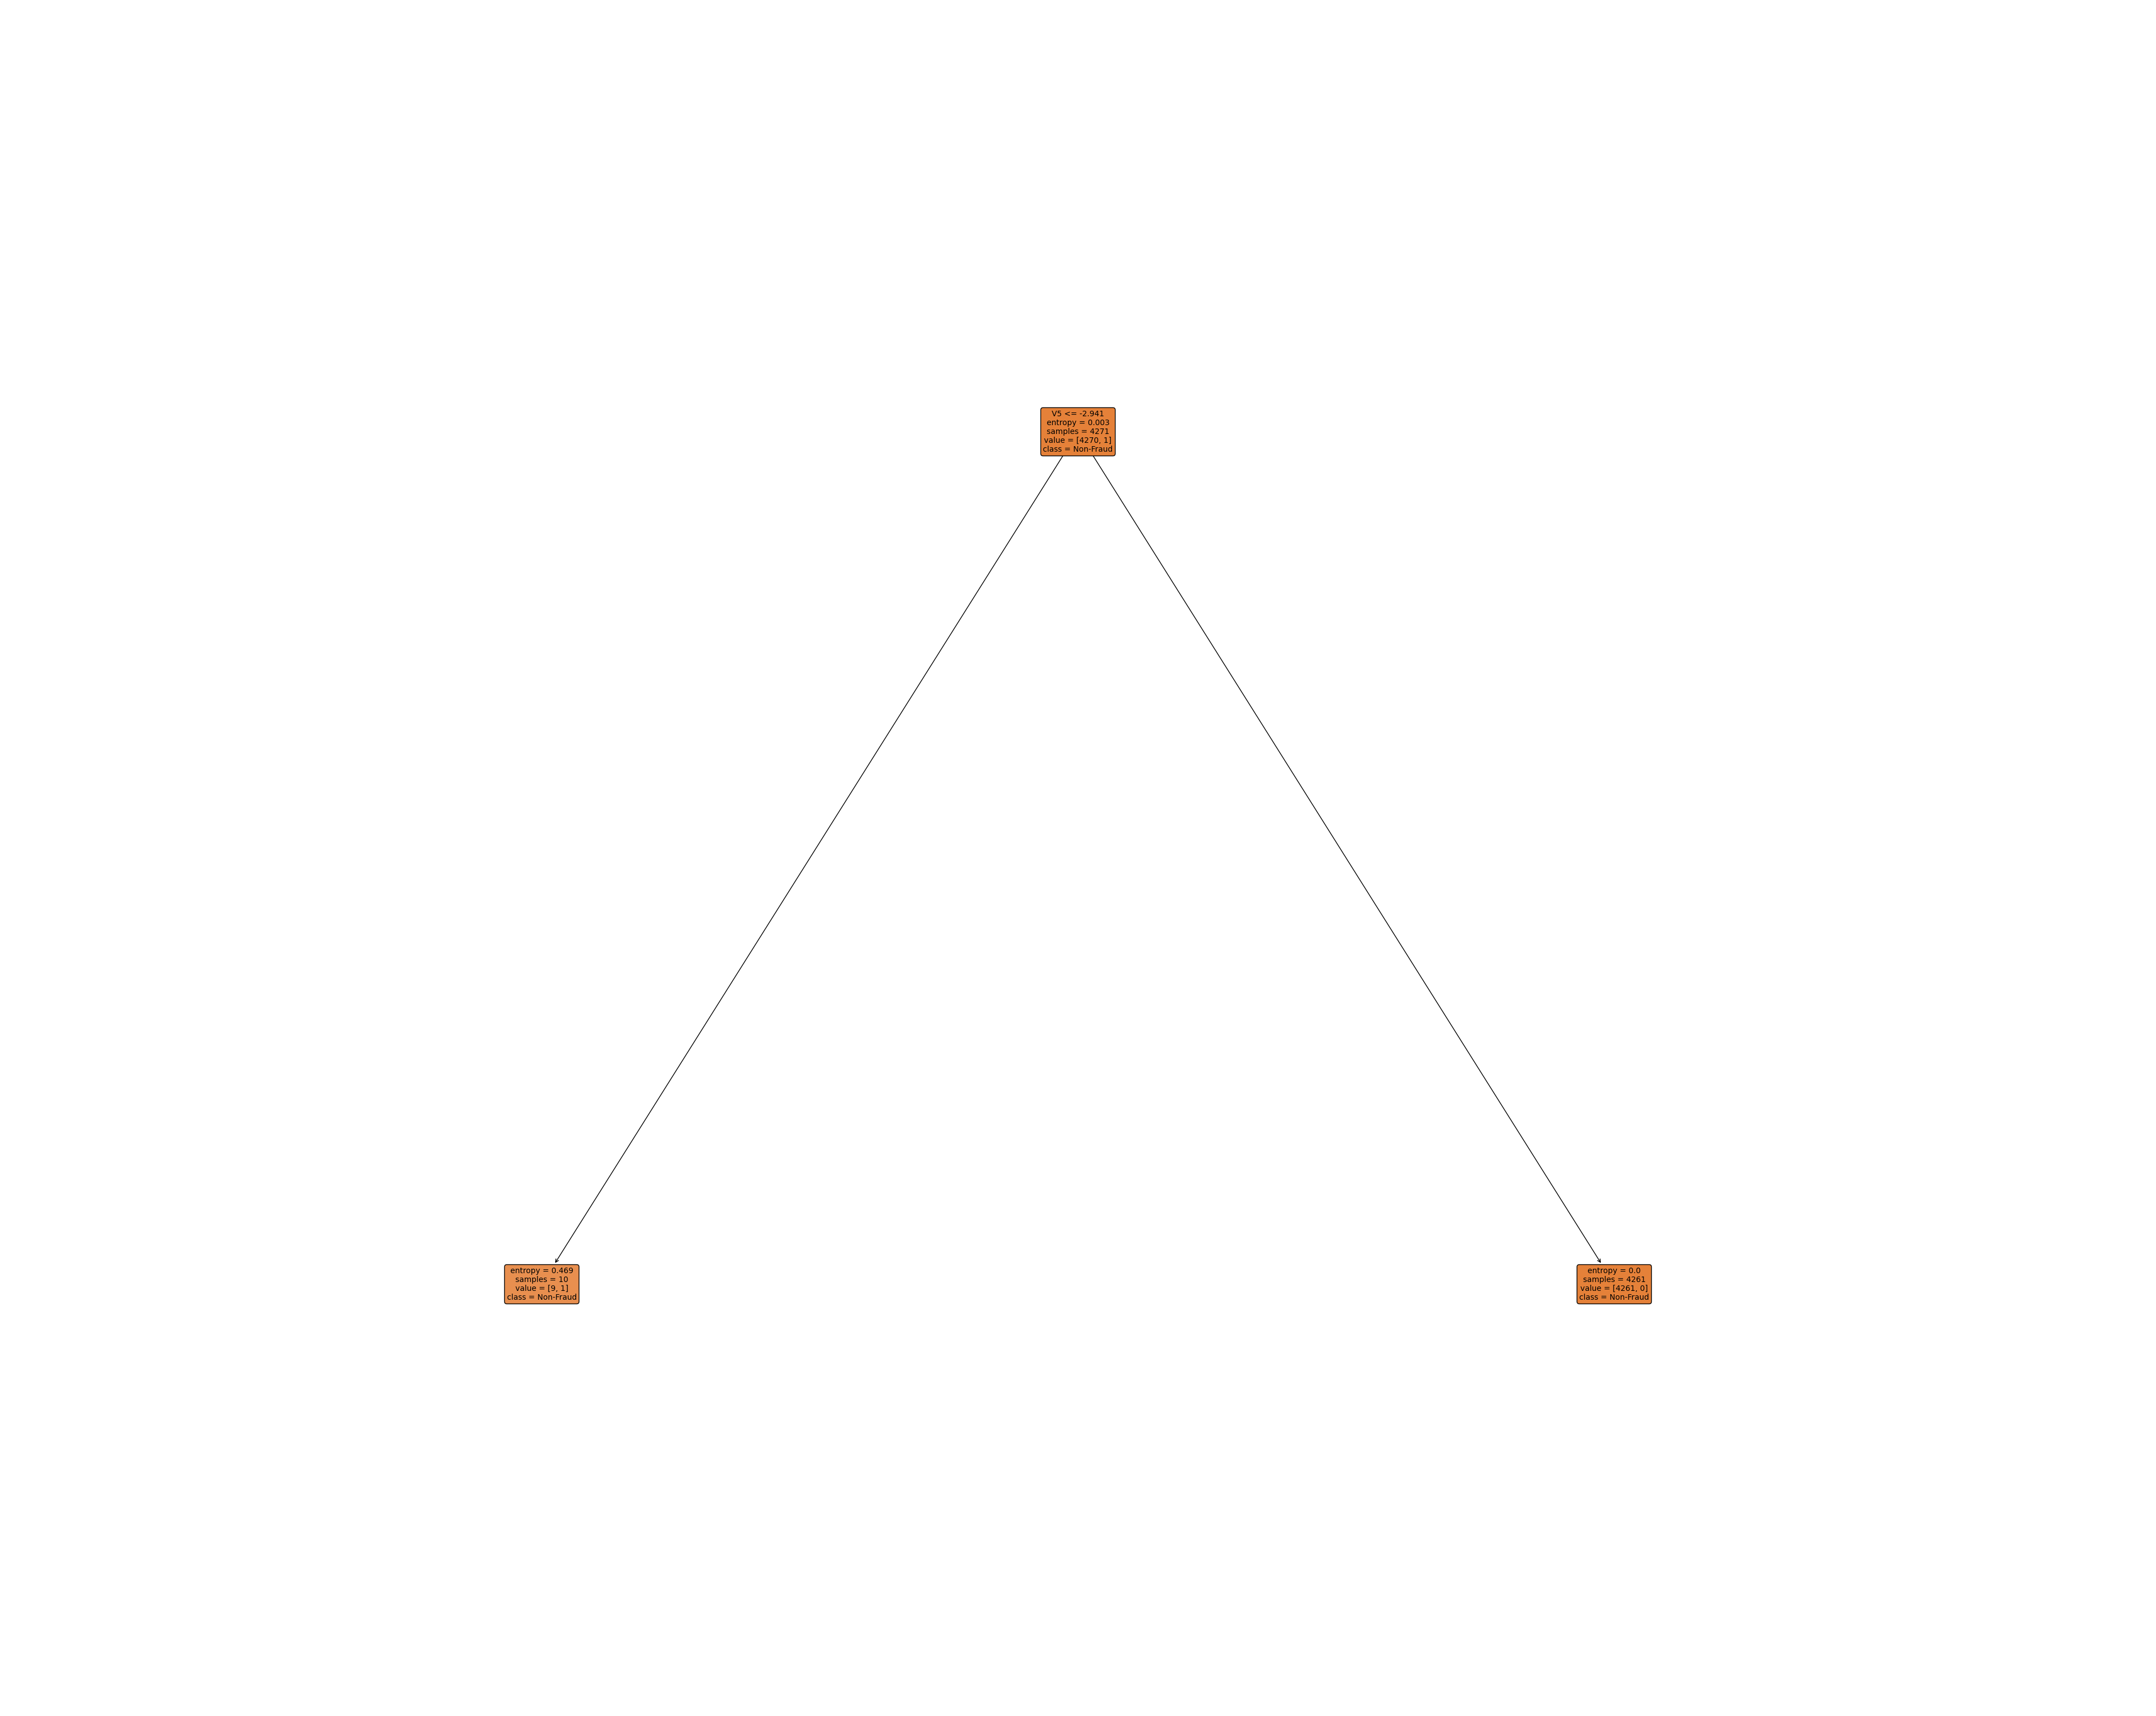

In [47]:
# Visualize the decision tree
plt.figure(figsize=(50, 40))
plot_tree(dt_model, filled=True, feature_names=X_no_outliers.columns, class_names=['Non-Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.show()# Visualize the decision tree
plt.figure(figsize=(50, 40))
plot_tree(dt_model, filled=True, feature_names=X_no_outliers.columns, class_names=['Non-Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.show()

# **Decision Tree Model Confusion Matrix Plotting**


In [53]:
pip install scikit-plot


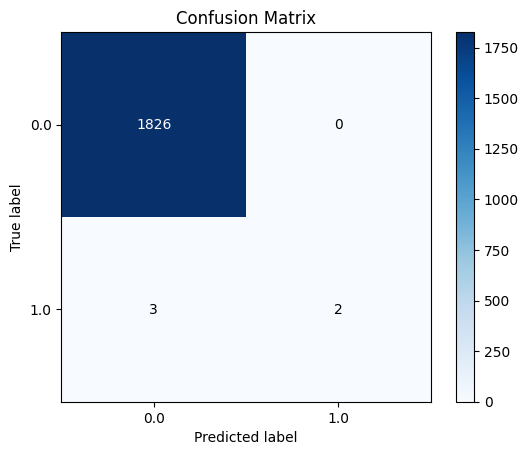

In [54]:
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have X_train, Y_train, X_test, and Y_test defined and a Decision Tree model trained
# ...

# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Get predictions
Y_pred = dt_model.predict(X_test)

# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)
plt.show()


# **Logistic Regression Model Training**

In [59]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(max_iter=500)

logistic_regressor.fit(X_train_selected, Y_train)
L_pred = logistic_regressor.predict(X_test_selected)

# **Logistic Regression Overfitting/Underfitting**

In [61]:
print('Training set score: {:.4f}'.format(logistic_regressor.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(logistic_regressor.score(X_test_selected, Y_test)))

Training set score: 1.0000
Test set score: 0.9984


# **Logistic Regression Model Confusion Matrix Plotting**

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

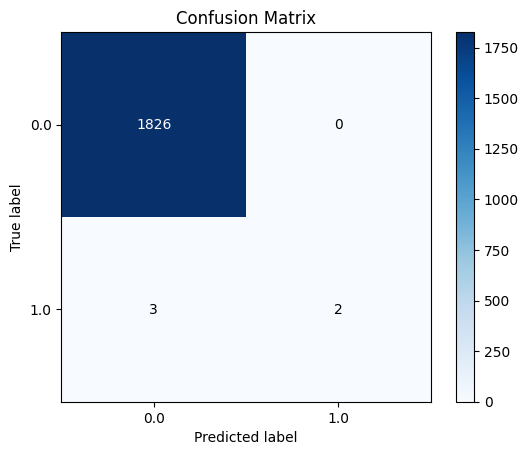

In [62]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, L_pred)

# **Logistic Regression Model Evaluation**

In [65]:
# Evaluate the model
accuracy = accuracy_score(Y_test, L_pred)
classification_report_result = classification_report(Y_test, L_pred)
confusion_matrix_result = confusion_matrix(Y_test, L_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, L_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1826
         1.0       1.00      0.40      0.57         5

    accuracy                           1.00      1831
   macro avg       1.00      0.70      0.79      1831
weighted avg       1.00      1.00      1.00      1831


Confusion Matrix:
[[1826    0]
 [   3    2]]

Accuracy: 0.9983615510649918
Precision: 0.9983642385154046
Recall: 0.9983615510649918
F1 Score: 0.9980111272786965



#Results of Logistic Regression:



> **Accuracy**  = 99%

> **Precision** = 99%




